<a href="https://colab.research.google.com/github/isobela/WIDS-Case-Competiton/blob/main/wids_casecomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Case Competition 2024

Kaggle Competition: https://www.kaggle.com/competitions/effects-of-policy-on-the-housing-market

**Community Alignment and Compliance**

Ensure that recommended strategies align with Vancouver’s
regulatory goals and community needs, fostering sustainable
housing options that support local housing availability and
affordability initiatives.

## Data Preparation

### Load train and test datasets

In [1]:
import pandas as pd

In [2]:
train_url = 'https://raw.githubusercontent.com/isobela/WIDS-Case-Competiton/refs/heads/main/train.csv'
train_data = pd.read_csv(train_url)
train_data.head(3)

,Unnamed: 0,id,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue
0,879,19792418,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,...,4.8,4.82,4.90,4.87,4.69,4.81,f,3,0.77,2108
1,6416,1015650685503221866,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,2730
2,1820,35265562,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,...,4.9,4.78,4.97,4.94,4.90,4.75,f,1,3.22,2254


In [3]:
test_url = 'https://raw.githubusercontent.com/isobela/WIDS-Case-Competiton/refs/heads/main/test.csv'
test_data = pd.read_csv(test_url)
test_data.head(3)

,id,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,4465400,Home in Vancouver · ★4.98 · 4 bedrooms · 4 bed...,We are less than a block to Kits pool - the la...,23168796,Oliver & Ashleigh,within a few hours,100%,67%,f,1,...,4.98,4.93,4.95,5.0,5.0,4.98,4.88,f,1,0.38
1,608629349064811166,Rental unit in Vancouver · 1 bedroom · 1 bed ·...,One of the most eclectic areas in the Lower Ma...,16926150,Jesse,NaN,NaN,NaN,f,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN
2,981894508939312892,Rental unit in Vancouver · ★5.0 · 1 bedroom · ...,Le Soleil Hotel and Suites is situated in the ...,536871978,Ivan,within an hour,100%,95%,f,4,...,5.00,5.00,4.88,5.0,5.0,5.00,4.88,f,4,2.96


### Exploratory Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**Train Data Overview**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      5352 non-null   int64  
 1   id                              5352 non-null   int64  
 2   name                            5352 non-null   object 
 3   neighborhood_overview           3476 non-null   object 
 4   host_id                         5352 non-null   int64  
 5   host_name                       5352 non-null   object 
 6   host_response_time              4263 non-null   object 
 7   host_response_rate              4263 non-null   object 
 8   host_acceptance_rate            4620 non-null   object 
 9   host_is_superhost               5315 non-null   object 
 10  host_listings_count             5352 non-null   int64  
 11  host_total_listings_count       5352 non-null   int64  
 12  neighbourhood                   34

**Revenue Distribution**

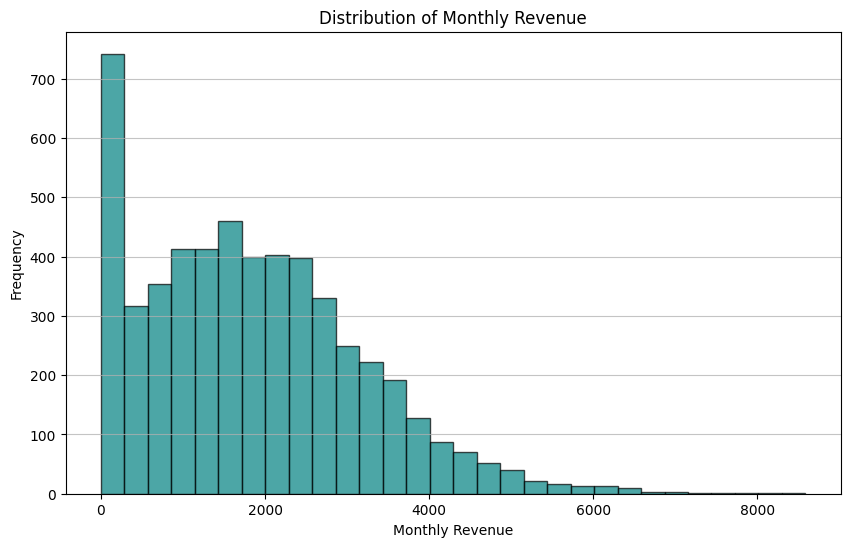

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['monthly_revenue'], bins=30, alpha=0.7, color='teal', edgecolor='black')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Relationship between Property Type and Monthly Revenue**

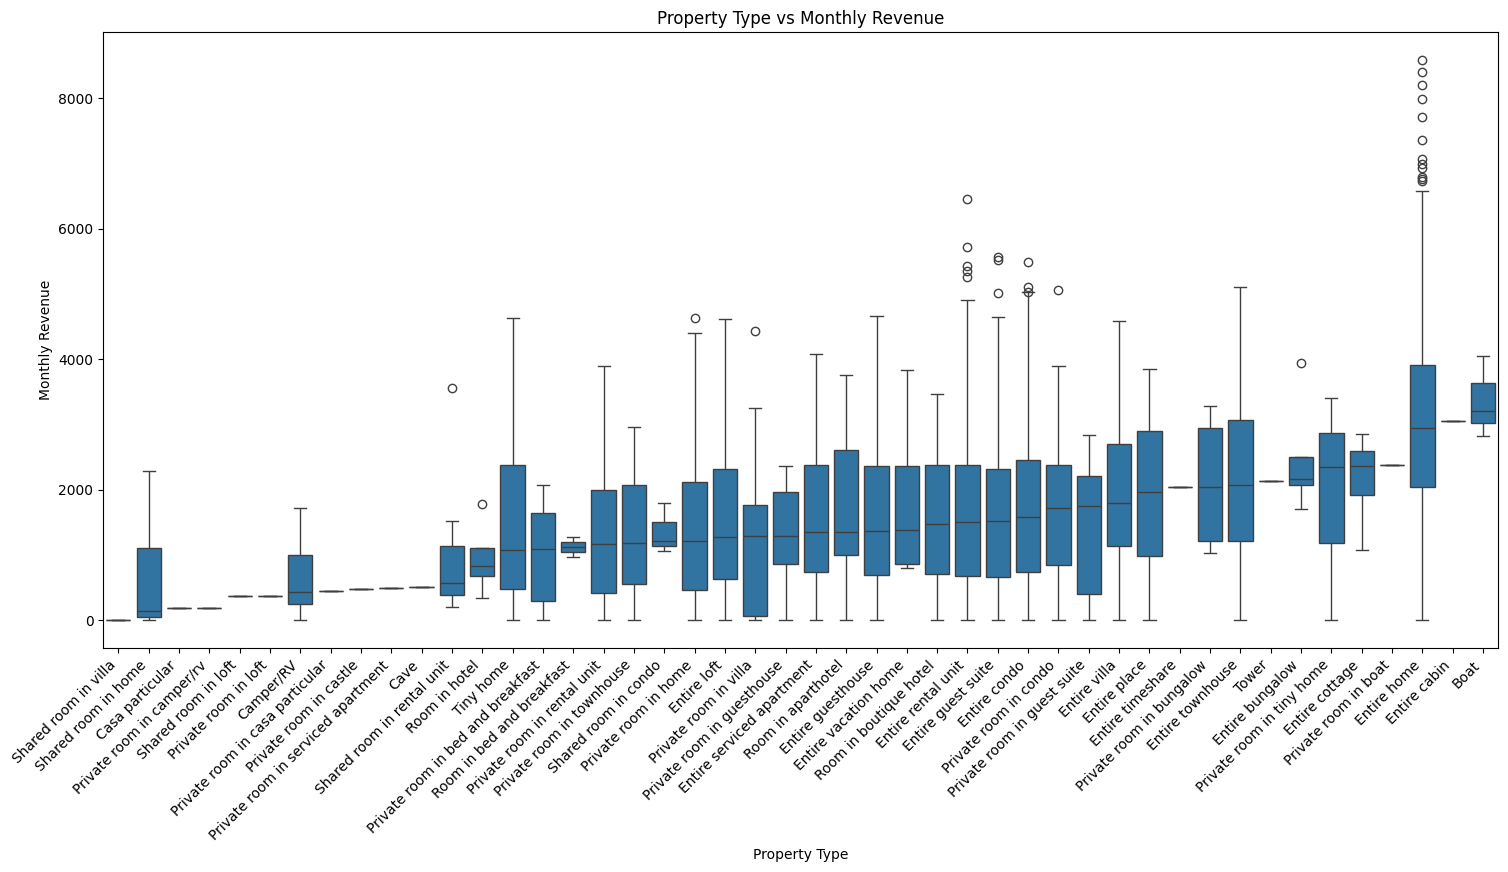

In [7]:
sorted_types = train_data.groupby('property_type')['monthly_revenue'].median().sort_values().index
train_data['property_type'] = pd.Categorical(train_data['property_type'], categories=sorted_types, ordered=True)

plt.figure(figsize=(18, 8))
sns.boxplot(data=train_data, x='property_type', y='monthly_revenue')
plt.title('Property Type vs Monthly Revenue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Property Type')
plt.ylabel('Monthly Revenue')
plt.show()

**Review Score Box Plots**

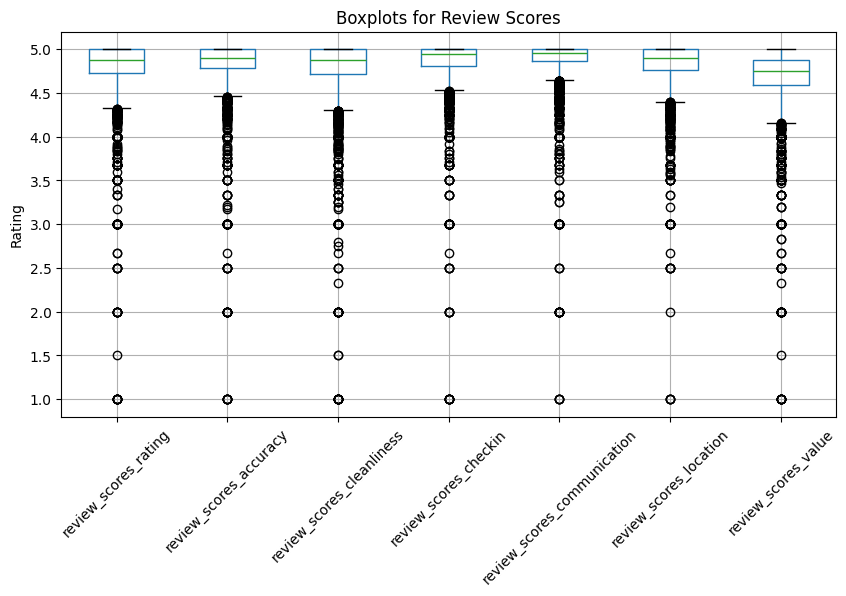

In [8]:
plt.figure(figsize=(10, 5))

review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

train_data.boxplot(column= review_columns)
plt.title('Boxplots for Review Scores')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


**Association between Review and Revenue**

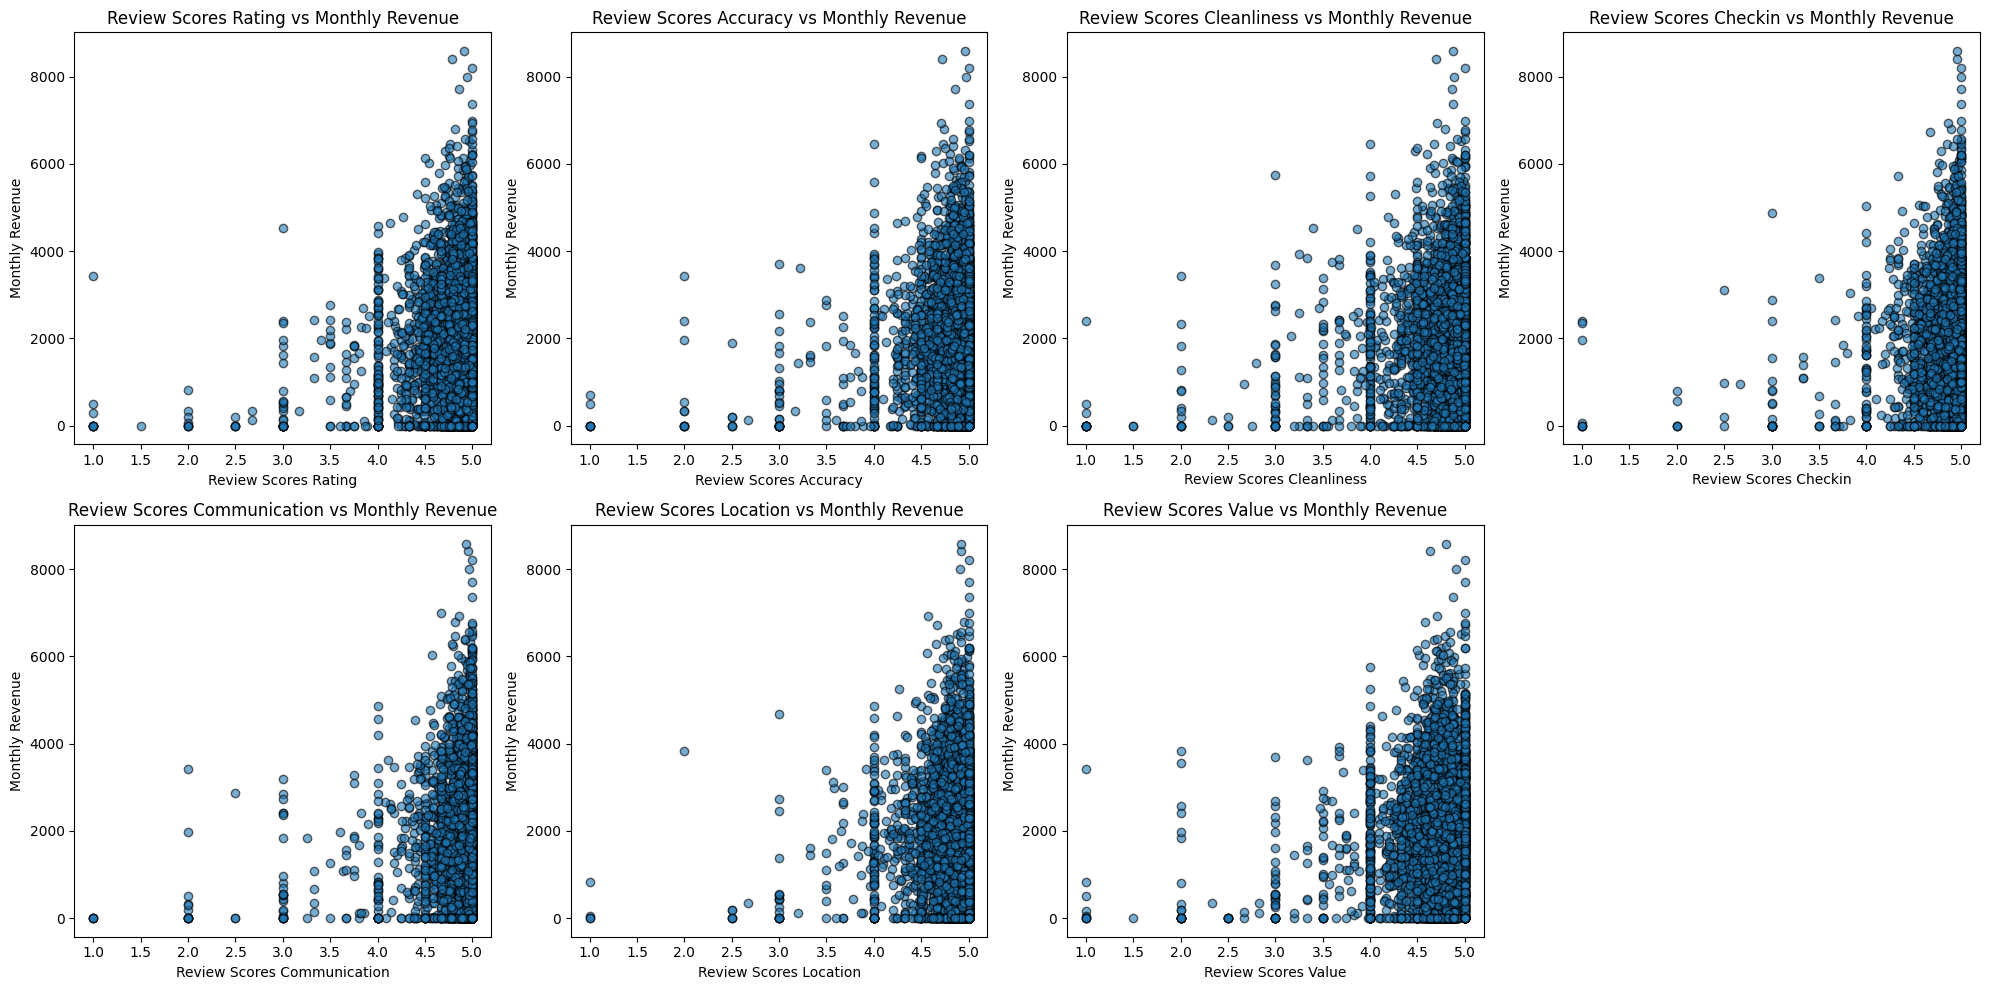

In [9]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(review_columns):
    plt.subplot(2, 4, i + 1)
    plt.scatter(train_data[column], train_data['monthly_revenue'], alpha=0.6, edgecolor='k')
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Monthly Revenue')
    plt.title(f'{column.replace("_", " ").title()} vs Monthly Revenue')

plt.tight_layout()
plt.show()

**Map Visualization of Monthly Revenue**

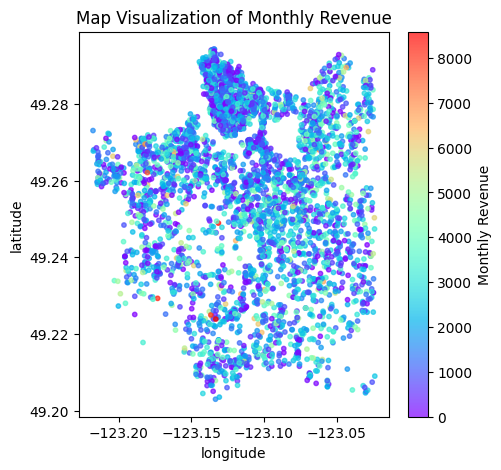

In [10]:
# Assuming train_data is your DataFrame
plt.figure(figsize=(5, 5))
scatter = plt.scatter(
    train_data['longitude'],
    train_data['latitude'],
    c=train_data['monthly_revenue'],
    cmap='rainbow',
    alpha=0.7,
    s=10
)
plt.colorbar(scatter, label='Monthly Revenue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Map Visualization of Monthly Revenue')
plt.show()


### Data Cleaning

Since the 'bathrooms' and 'bedrooms' columns contain no non-null values, I chose to remove them.

For the remaining variables, I opted to eliminate the rows with null values.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
train_data = train_data.drop(columns=['bathrooms', 'bedrooms'], errors='ignore')
train_data = train_data.dropna()

In [13]:
train_data.describe()

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,monthly_revenue
count,2413.000000,2.413000e+03,2.413000e+03,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,...,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,3013.166598,3.674166e+17,1.780752e+08,11.625777,17.560298,49.263070,-123.110056,3.628264,1.969747,12.314132,...,4.817762,4.840622,4.813121,4.865143,4.897497,4.829536,4.691165,8.500622,2.209494,1933.327808
std,1799.244523,4.134606e+17,1.727599e+08,36.750667,50.974746,0.020533,0.037896,2.082418,1.180759,18.070090,...,0.245264,0.240258,0.280545,0.241769,0.194539,0.245626,0.314944,24.203679,2.053909,1342.853909
min,0.000000,1.318800e+04,6.033000e+03,1.000000,1.000000,49.202960,-123.217553,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.010000,0.000000
25%,1503.000000,3.001272e+07,2.309381e+07,1.000000,1.000000,49.250500,-123.129544,2.000000,1.000000,2.000000,...,4.750000,4.800000,4.760000,4.830000,4.880000,4.770000,4.620000,1.000000,0.490000,908.000000
50%,2923.000000,5.180622e+07,1.192960e+08,2.000000,3.000000,49.269420,-123.109590,3.000000,2.000000,3.000000,...,4.880000,4.900000,4.890000,4.930000,4.960000,4.890000,4.750000,1.000000,1.640000,1845.000000
75%,4515.000000,8.007997e+17,2.992920e+08,5.000000,7.000000,49.279150,-123.088250,4.000000,2.000000,30.000000,...,4.980000,4.990000,4.990000,5.000000,5.000000,5.000000,4.860000,3.000000,3.390000,2765.000000
max,6627.000000,1.036518e+18,5.470111e+08,466.000000,559.000000,49.294360,-123.023903,16.000000,12.000000,365.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,134.000000,15.820000,8584.000000


## Model Selection

### Model Training

### Model Evaluation on Training Data

### Hyperparameter Tuning (optional)

# Test the Model